In [27]:
# Step 1: Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [28]:
# Step 2: Load the Dataset
# Make sure the CSV file is in your working directory, or provide the correct path
data = pd.read_csv('PCOS_infertility.csv')

In [29]:
# Step 3: Exploratory Data Analysis (EDA)
# Viewing the first few rows
print(data.head())

   Sl. No  Patient File No.  PCOS (Y/N)    I   beta-HCG(mIU/mL)  \
0       1             10001           0                    1.99   
1       2             10002           0                   60.80   
2       3             10003           1                  494.08   
3       4             10004           0                    1.99   
4       5             10005           0                  801.45   

   II    beta-HCG(mIU/mL) AMH(ng/mL)  
0                    1.99       2.07  
1                    1.99       1.53  
2                  494.08       6.63  
3                    1.99       1.22  
4                  801.45       2.26  


In [30]:
# Checking for missing values
print(data.isnull().sum())

Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
AMH(ng/mL)                0
dtype: int64


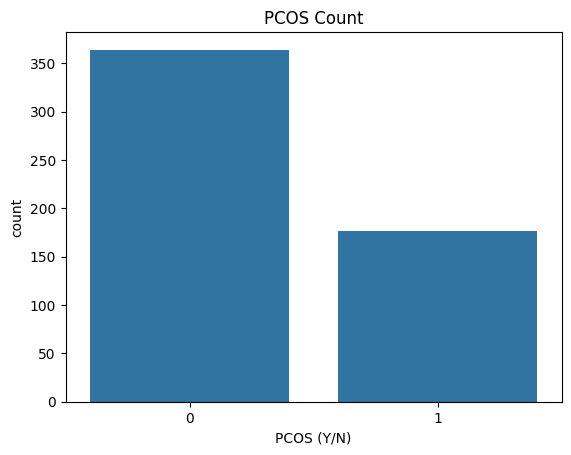

In [31]:
# Checking the distribution of target variable (PCOS present or not)
sns.countplot(x='PCOS (Y/N)', data=data)
plt.title('PCOS Count')
plt.show()

In [32]:
# Step 4: Data Preprocessing
# Dropping irrelevant columns (adjust based on dataset analysis)
data = data.drop(['Patient File No.'], axis=1)

In [33]:
# Separating features (X) and target (y)
X = data.drop(['PCOS (Y/N)','Sl. No'], axis=1)
y = data['PCOS (Y/N)']

In [34]:
# Fill non-numeric columns with mode (or another method)
X[X.select_dtypes(exclude='number').columns] = X.select_dtypes(exclude='number').fillna(X.mode().iloc[0])


In [35]:
# Convert non-numeric columns to NaN (useful if numeric columns contain strings)
X = X.apply(pd.to_numeric, errors='coerce')
print(X.columns)




Index(['  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'AMH(ng/mL)'], dtype='object')


In [42]:
# Function to remove outliers using the IQR method for specific features
def remove_outliers(X, columns):
    for col in columns:
        Q1 = X[col].quantile(0.25)
        Q3 = X[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter rows that are within the bounds
        X = X[(X[col] >= lower_bound) & (X[col] <= upper_bound)]
    return X

# Applying the function to the specific features (Inhibin B, Inhibin A, and AMH)
outlier_columns = ['  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'AMH(ng/mL)']
X = remove_outliers(X, outlier_columns)

# Resetting the index for X and y to ensure consistency
X = X.reset_index(drop=True)

# Now, filter y to have the same number of rows as X_filtered
y = y.loc[X.index].reset_index(drop=True)


In [43]:
# Check for remaining non-numeric data
print(X.isnull().sum())
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
AMH(ng/mL)                0
dtype: int64


In [44]:
#after handling missing values and dropping irrelevant columns
print("Features used for prediction:")
print(X.columns)


Features used for prediction:
Index(['  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'AMH(ng/mL)'], dtype='object')


In [45]:
# Step 5: Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [46]:
# Step 6: Model Building - Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [47]:
# Step 7: Model Prediction
y_pred = rf_model.predict(X_test)


In [48]:
# Step 8: Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.696969696969697
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.83      0.79        23
           1       0.50      0.40      0.44        10

    accuracy                           0.70        33
   macro avg       0.63      0.61      0.62        33
weighted avg       0.68      0.70      0.69        33



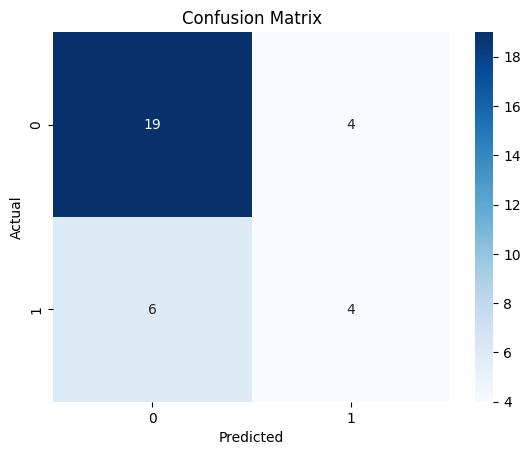

In [49]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [50]:
# Step 9: Feature Importance (Optional - for Random Forest)
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

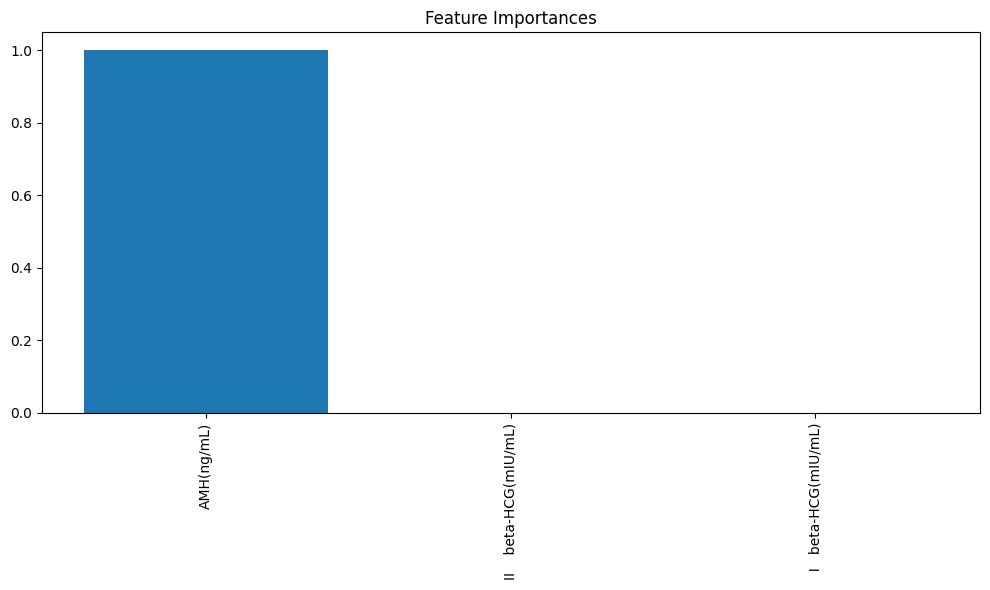

In [51]:
# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

In [52]:
import pickle 
pickle.dump(rf_model, open(r'iteration_1.pickle', 'wb'))